# Exploratory Data Analysis for Life-Style

## 1. First Step: Understanding the Data and Running Basic Libraries

In this part we will 

In [14]:
# This bunch of package is what i call - basic kit
import pandas as pd                  # for CSV vizualization and DF manipulations
import matplotlib.pyplot as plt      # for Graphics
import seaborn as sns                # for pretty Graphics      
import numpy as np                   # for matrix and arrays operations

# For path configurations
from pathlib import Path
import os

In [3]:
# Get the data from the .csv with pandas
# The double dots asks for see the relative path from Earthquake instead notebooks directory.

raw_data = pd.read_csv("../data/Final_data.csv")

# For now, we will ignore the meal_metadata.csv

In [4]:
# First Impression of all, the head

raw_data.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


`describe()` returns to us a evaluation of the dataset.

Means, Count, Standard variation and percentils.

Pretty useful to look how the values changes, if there's a lot of NaN values and i'ts variance.

In [5]:
raw_data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851454,73.898832,1.723094,179.889702,143.704306,62.195813,1.259446,1280.109601,26.101313,2.627486,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


`info()` is a function that returns a more simple evaluation than `describe()` does but show us the **data types**:

We have `object` types and `float64` types, which means that we have `string (usually)` structures and `float-numbers` values here.

Also, we have 53 columns.

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

There we can see all columns wich `data type` is `object`.

In [7]:
raw_data.select_dtypes("object").count()

Gender                 20000
Workout_Type           20000
meal_name              20000
meal_type              20000
diet_type              20000
cooking_method         20000
Name of Exercise       20000
Benefit                20000
Target Muscle Group    20000
Equipment Needed       20000
Difficulty Level       20000
Body Part              20000
Type of Muscle         20000
Workout                20000
Burns_Calories_Bin     20000
dtype: int64

Let's see what values each object columns have:

Now we can see patterns, like:
Gender = [Female, male] or Difficulty Level = [Beginner, Indermediate, Advanced]

In [8]:
raw_data.select_dtypes("object").value_counts()

Gender  Workout_Type  meal_name  meal_type  diet_type   cooking_method  Name of Exercise  Benefit                                        Target Muscle Group             Equipment Needed        Difficulty Level  Body Part  Type of Muscle   Workout                 Burns_Calories_Bin
Female  Cardio        Other      Breakfast  Balanced    Baked           Bear Crawls       Improves balance and leg strength              Lower Back, Glutes              Step or Box             Beginner          Chest      Wrist Flexors    Pull-ups                Very High             1
                                                                                          Improves hip power and cardiovascular fitness  Quadriceps, Hamstrings, Glutes  Dumbbells or Barbell    Intermediate      Legs       Wrist Extensors  Decline dumbbell press  Low                   1
                                                                        Bench Press       Builds calf muscles                            Triceps

To see if there is any `NaN` values, which means, cell with no values, we can use:

As we see, all cells have values, wich is really good because we will not need no fit if we would create a model for this.

In [9]:
raw_data.isna().sum()

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

## 2. Looking for Relations

In this part we will see:

- Graphs using `Seaborn` and `Matplotlib`
- `Pandas` manipulations with DataSets
- Matrix's using `numpy` to see relations and correlations

### 2.1 Graphs

First of all, we will create a code for save all the graphs on a directory.

In [16]:
GRAPH_PATH = Path("..") / "graphs"
GRAPH_PATH.mkdir(parents=True, exist_ok=True)   # Make sure to make a directory and its parents if necessary

def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = GRAPH_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()           # Improves the visualization for a image creation automatically
    plt.savefig(path, format=fig_extension, dpi=resolution)

For padronization in a sequential plots, we will use `plt.rc()` to make a pattern:

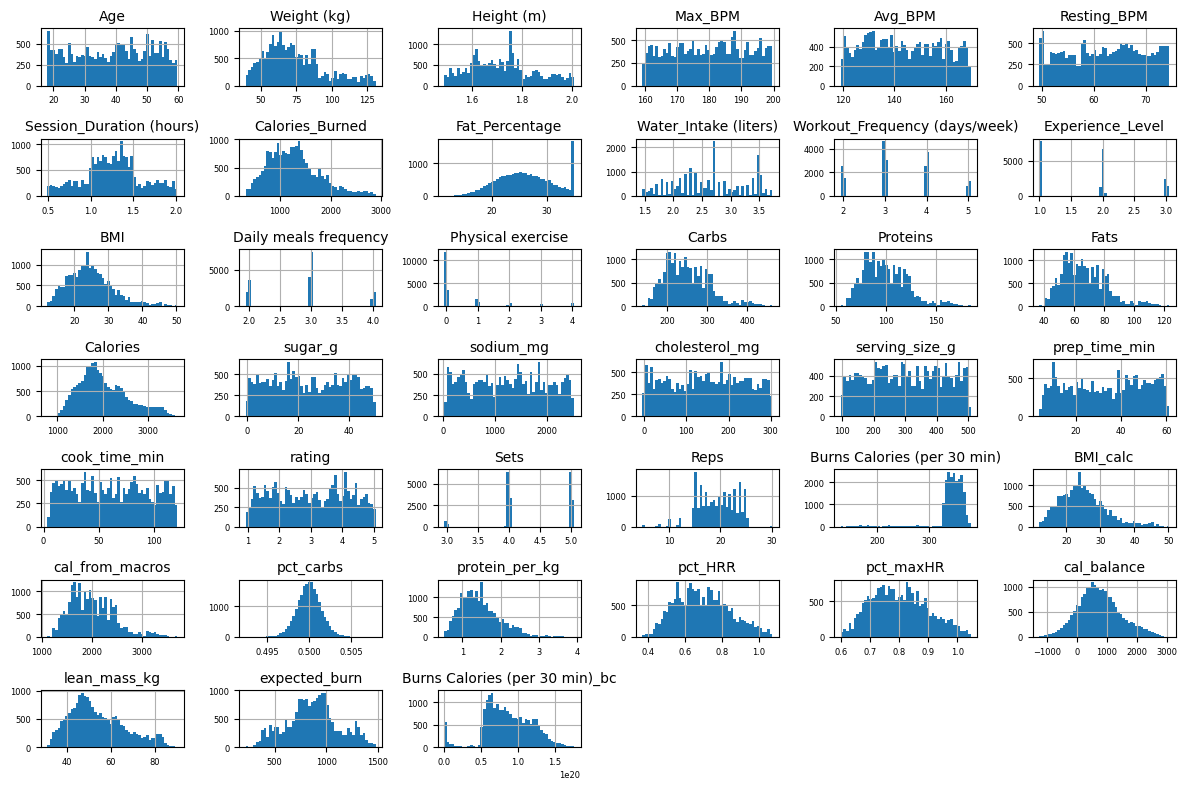

In [ ]:
plt.rc('font', size = 10)
plt.rc('axes', labelsize = 10, titlesize = 10)
plt.rc('legend', fontsize = 10)
plt.rc('xtick', labelsize = 6)
plt.rc('ytick', labelsize = 6)


raw_data.hist(bins=50, figsize=(12,8))
save_fig("attribute_hist_plot")
plt.show()

Once it's done. We can look at all those histograms and think: `Why?`

Well, it allow us to understand the behavior for each atributte in quantity. This can show us a pattern of a distribution, like a `Gaussian` or `Poisson`.
Also, we can see if the data have any limit of unexpect end. This can cause a bad modeling because the data can be incomplete or truncated.

In this case, we shall use `fit`. Or, asks for a more complete data.